신경망 생성 및 학습을 돕기 위해 PyTorch에서 제공하는 도구들:
torch.nn, torch.optim, Dataset 그리고 DataLoader

In [2]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True,exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [3]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train,y_train),(x_valid,y_valid),_) = pickle.load(f, encoding="latin-1")

(50000, 784)
<class 'numpy.ndarray'>


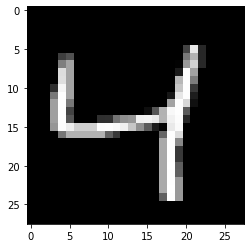

In [4]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[2].reshape((28,28)),cmap="gray")
print(x_train.shape)
print(type(x_train))

In [5]:
import torch

# map을 통해 나눠놔던 (x_train,y_train,x_valid,y_valid)을 tensor로 변환함.
x_train,y_train,x_valid,y_valid = map(
    torch.tensor,(x_train,y_train,x_valid,y_valid)
)
n,c = x_train.shape
print(x_train,y_train)
print(x_train.shape)
print(x_train.min(),y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0.) tensor(9)


PyTorch는 랜덤, 0, 1로만 이루어진 tensor를 생성하는 메서드를 제공한다.
우리는 간단한 선형 모델의 가중치(weights)와 절편(bias)를 생성하기 위해 이것들을 사용할 것이다.

[ 랜덤, 0, 1로만 이루어진 tensor ] 의 역할: PyTorch에게 이들이 기울기(gradient)가 필요하다고 알려준다.
이를 통해, PyTorch는 tensor에 행해지는 모든 연산을 기록하게 하고,
-> 행해진 모든 연산을 기록했기 때문에, 자동적으로 back-propagation이 진행되면서 기울기를 계산한다.

가중치는 requires_grad를 초기화(initialization) 다음에 설정한다.

(in-place) 연산 뜻: 바꿔치기 연산이라는 뜻이다.
추가적인 메모리가 들지 않는다.
a.fill_(3.5)
a의 값이 3.5로 바꿔치기 됩니다. 이런 느낌.

PyTorch에서 _ 다음에 오는 메서드 이름은 연산이 in-place로 수행되는 것을 의미한다.
weights.requires_grad_()

In [6]:
a = torch.zeros(3,3)
b = torch.ones(3,3)
print(a)
print(a+b)
a.fill_(3.5)
print(a)
print(a+b)


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[3.5000, 3.5000, 3.5000],
        [3.5000, 3.5000, 3.5000],
        [3.5000, 3.5000, 3.5000]])
tensor([[4.5000, 4.5000, 4.5000],
        [4.5000, 4.5000, 4.5000],
        [4.5000, 4.5000, 4.5000]])


In [7]:
# weights = (torch.randn(784, 10,requires_grad=True) / math.sqrt(784))

import math

# Xavier initialisation 기법 사용
# (1/sqrt(n)을 곱해주는 것을 통해서 초기화)

# 가중치가 random임
weights = torch.randn(784,10)
print(weights)
weights = weights / math.sqrt(784)
print(weights)

# 위의 초기화 단계 (randn)가 기울기에 포함되지 않기 위해 초기화 후
# requires_grad를 설정해준다.
weights.requires_grad_()

# bias 주목할 점이, requires_grad=True 라는 점이다.
# 계속해서 bias를 포함해서 계산하거나, bias를 포함해서 계산했던 값들에
# 연산이 계속 기록된다.(PyTorch의 고유한 기능)
bias = torch.zeros(10, requires_grad=True)

tensor([[ 1.0413, -1.2746, -1.1292,  ..., -0.4048,  0.4602, -0.2642],
        [ 0.5860,  0.9938, -0.7320,  ...,  1.4435,  0.1860, -0.1217],
        [-0.1196,  0.5060,  1.1930,  ..., -0.7262,  1.2742, -0.2020],
        ...,
        [-0.4376,  0.0221,  1.5616,  ...,  0.6013, -0.1565,  1.5370],
        [ 2.2324,  0.4808, -0.2327,  ...,  1.4464, -0.5967,  0.6577],
        [-1.4010,  1.0267, -1.1726,  ..., -0.0085,  1.9846,  0.0880]])
tensor([[ 0.0372, -0.0455, -0.0403,  ..., -0.0145,  0.0164, -0.0094],
        [ 0.0209,  0.0355, -0.0261,  ...,  0.0516,  0.0066, -0.0043],
        [-0.0043,  0.0181,  0.0426,  ..., -0.0259,  0.0455, -0.0072],
        ...,
        [-0.0156,  0.0008,  0.0558,  ...,  0.0215, -0.0056,  0.0549],
        [ 0.0797,  0.0172, -0.0083,  ...,  0.0517, -0.0213,  0.0235],
        [-0.0500,  0.0367, -0.0419,  ..., -0.0003,  0.0709,  0.0031]])


In [8]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

# @: 행렬 곱셈(matrix multiplication) 연산을 의미한다.
# model(입력값 x)를 통해서 return 되는 값:
# (x*w + b)의 softmax 활성화 함수를 통과해서 나온 결과
# 이제는 다양한 비선형 데이터를 처리하는 함수들이 많지만, 여기서는 선형 방정식인
# y = x*w + b를 사용한다.

# 처음에 가중치 w를 랜덤으로 추출했기 때문에, 맨 처음에 model()을 통과한 결과는
# 그냥 랜덤으로 값을 예측한 것에 비해 나은 점이 없다.

# model함수는 bais를 사용한다.
def model(xb):
    return log_softmax(xb @ weights + bias)

In [9]:
# forward pass 과정

batch_size = 64

# 처음에 가중치 w를 랜덤으로 추출했기 때문에, 맨 처음에 model()을 통과한 결과는
# 그냥 랜덤으로 값을 예측한 것에 비해 나은 점이 없다.
xb = x_train[0:batch_size]

# preds는 bias를 사용하는 model함수를 사용한다.
preds = model(xb)
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.2587, -2.4193, -2.4787, -2.0466, -2.1802, -2.1293, -2.2182, -2.6956,
        -2.2400, -2.5409], grad_fn=<SelectBackward>) torch.Size([64, 10])


preds 텐서는 tensor 값 외에도, grad_fn=<SelectBackward> 라는 gradient function을 담고 있다.

이 gradient function인 grad_fn=<SelectBackward>은 나중에 역전파(backpropagation)과정을 위해 사용한다.
-> 나중에 역전파 과정으로 기울기값을 구하기 위해 사용할 것이다라는 말.

In [10]:
# 손실함수(loss function)을 사용하기 위한 음의 로그 우도 구현
# 음의 로그 우도(negative log-likelihood):
# 다중 클래스 분류에서 자주 사용되는 목적 함수이다.
# 직관적인 이해:
#   모델이 자신의 대답에 완전히 확신하고 대답이 잘못되면 손실이 높아진다.
#   모델이 자신의 대답에 완전히 확신하고 대답이 맞게 되면 손실이 낮아진다.

# 목적 함수(손실함수, 비용 함수, loss function, cost function)은 
# 네트워크가 최소화되도록 학습되는 함수이다.

# input: 예측 결과
# target: 정답 데이터
def negative_log_likelihood(input,target):
    return -input[range(target.shape[0]),target].mean()

loss_func = negative_log_likelihood

In [11]:
# yb는 정답 데이터(label 데이터)
yb = y_train[0:batch_size]

# 위에서 정의한 negative_log_likelihood를 통과한 결과로 loss 계산
# loss_func은 bias를 사용하는 model함수를 사용하는 preds를 사용한다.
# 따라서 grad_fn이 같이 사용된다.
print(loss_func(preds,yb))

tensor(2.2899, grad_fn=<NegBackward>)


In [12]:
# 정확도(accuracy)를 계산하기 위한 함수 구현
# 매 예측마다, 만약 가장 큰 값의 인덱스가 목표값과 동일하다면 그 예측은 올바른 것

# output: 모델을 통해 계산된 결과값
# yb는 정답 데이터(label 데이터)
def accuracy(output,yb):
    preds = torch.argmax(output,dim=1)
    return (preds == yb).float().mean()

In [13]:
print("정확도: ",float(accuracy(preds, yb))*100,"%",sep="")

정확도: 6.25%


저 위에까지가, 1 epoch의 train 후 정확도를 구한 과정이다.

이제는 loop를 통해서 여러 epoch를 돌려서 정확도를 개선해보자.

앞으로 수행할 것들:
1. 데이터의 미치배치를 선택(batch_size 크기 지정)
2. 모델을 이용하여 예측 수행
3. 손실 계산
4. loss.backward()를 이용하여 모델의 기울기 업데이트, 이 경우에는 weights와 bias를 업데이트.

가중치와 절편 업데이트는 torch.no_grad()라는 context manager 내에서 실행한다.
이유: 가중치와 절편 업데이트가 다음 기울기의 계산에 기록되지 않기를 원하기 때문이다.

Context Manager란?:
1. "with문을 실행할 때 설정하는 런타임 컨텍스트를 정의하는 객체" 라고 한다.
2. Context Manager는 with문을 사용하여 호출되고, 원하는 타이밍에 정확하게 리소스를 할당하고 제공하는 역할을 한다.
3. 즉, 특정 행동을 할 때 항상 일정한 런타임 환경을 만들어주기 위해 특정 행동에의 진입과 종료를 관리해주는 친구가 바로 context manager이라는 것이다.

한마디로, with문 내에 어떤 특정한 환경을 만들어서 뭔가 따로 실행하게 하는 것이다.

torch.no_grad()란?:
gradient 연산 옵션을 끌 때 사용하는 파이썬 컨텍스트 매니저이다.
즉, with torch.no_grad(): 을 하지 않고 계산하면, 계산 결과가 계속 기록될(auto grad가 자동 기록) 것이다.

Autograd: .grad 속성에 있는 각 모델 파라미터에 대한 기울기를 계산하고 저장한다.
나중에 .backward()를 호출하면 autograd가 기울기를 계산해준다.
.backward()는 Require_grad=True로 설정된 모든 텐서들에 대해 gradient를 계산한다.

backpropagation에서 gradient를 계산하는 첫 starting point가 되는 값은 loss 값이다.
우리는 이 loss값을 모든 가중치들(parameters; weight and bias)에 대해서(with respect to) 미분을 계산하게 된다.

이러한 .backward() 메서드는 gradient 계산이 시작되는 지점인 loss 변수에 적용해줘야 한다.

loss.backward()를 제어하는 역할을 하는 변수는 bias, weights이다.
왜냐면, 이들은 선언됐을 때부터 requires_grad = True로 설정했기 때문이다.

model() 함수와 loss 함수를 사용 후, 연산에 대한 기울기들을 이용해서
가중치와 절편을 업데이트한다.

업데이트를 하고나서 다시 기울기를 0으로 설정해서 다음 loop를 준비한다.
0으로 초기화하지 않으면, 일어난 모든 연산의 누적 집계를 기록하게 된다.

In [14]:
lr = 0.5
epochs = 2

for epoch in range(epochs):
    print(2)
    for i in range((n-1) // batch_size + 1):
        start_i = i * batch_size
        end_i = start_i + batch_size
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred,yb)
        
        loss.backward()
        
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()
            

2
2


여기 위에까지가 아주아주 기본적인 신경망을 구현한 것이다.
바로 단일층 신경망(single layer neural network)이다.
입력층, 출력층, 활성화 함수가 있는 신경망이다.
'은닉층'이 없다. 오늘날의 일반적인 신경망들은 은닉층(hidden layer)를 포함한다.
은닉층이 많을수록(깊을수록) 비선형 데이터에 대해서 더 정확한 분류가 가능하지만,
은닉층이 많을수록(깊을수록) train 데이터셋에 과적합(overfitting)된다.
이러한 문제를 해결한 모델이 ResNet

    참고:
        로지스틱 회귀(다중 회귀) == 은닉층이 없는 신경망

In [15]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0829, grad_fn=<NegBackward>) tensor(1.)


코드 refactoring: 겉으로 보이는 동작의 변화 없이 소프트웨어 구조를 바꾼다는 뜻
소프트웨어를 보다 쉽게 이해할 수 있고, 적은 비용으로 수정할 수 있도록 겉으로 보이는
동작의 변화 없이 내부 구조를 변경하는 것을 말한다.
코드 가독성과 질을 높이기 위한 목적으로 정리를 하는 것으로 생각할 수 있다.

위에까지의 과정들을 PyTorch의 nn 클래스의 장점을 활용하여 더 간결하고 유연하게 만들어 보자.
1. 작성했던 활성화 함수, 손실 함수 -> torch.nn.functional의 함수로 대체
(관례에 따라, 일반적으로 torch.nn.functional을 F라는 네임스페이스(namespace)를 통해 임포트(import) 한다)
torch.nn.functional 모듈에는 torch.nn 라이브러리의 모든 함수가 포함되어 있다.
torch.nn.functional 에는 이외에도 풀링ㅎ 함수, 컨볼루션 연산, 선형 레이어 등이 있다.

In [16]:
import torch.nn.functional as F

# loss_func refactoring 전:
"""
def negative_log_likelihood(input,target):
    return -input[range(target.shape[0]),target].mean()

loss_func = negative_log_likelihood
"""
# loss_func refactoring 후:
loss_func = F.cross_entropy

def model(xb):
    return xb @ weights + bias

In [17]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

# 결과값이 같다.

tensor(0.0829, grad_fn=<NllLossBackward>) tensor(1.)


명확하고 간결한 train loop를 위해
nn.Module과 nn.Paramete를 사용한다.

nn.Module:
PyTorch에서 신경망은 보통 신경망 모듈(torch.nn.Module)을 '상속'받는 파이썬 클래스로 '정의'한다. -> 그냥 약속임. 그냥 신경망 클래스 정의할 때,
class GNNStack(nn.Module): 
이런 식으로 쓰는 것이 약속되어 있다.(뇌피셜)

nn.Module을 상속받으면 파이토치 프레임워크에 있는 각종 도구를 쉽게 적용할 수 있다.
nn.Module (대문자 M) 은 PyTorch 의 특정 '개념'이고, 우리는 이 클래스를 많이 사용할 것입니다.

nn.Module은 사용할 몇 가지 속성(attribute)와 메소드(.parameters() 와 .zero_grad() 같은) 가지고 있다.

In [18]:
from torch import nn

# 위에까지에서는 model()함수, 초기화 등을 그냥 막 흩어져서 했는데,
# 이제는 깔끔하게 하나의 클래스에 담아줘서 더 보기좋고 유연하게 됐다. (refactoring)

# Refactoring 전(Mnist 데이터셋에 대한 다중 회귀를 위해 처음에 했던 코드):
"""
import math

weights = torch.randn(784,10)
weights = weights / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

def model(xb):
    return log_softmax(xb @ weights + bias)
"""

# Refactoring 후:

class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb):
        return xb @ self.weights + self.bias

In [19]:
# 이제 model() 함수를 사용하려면, class로 만들어진 모델 틀을 인스턴스화 한다.
model = Mnist_Logistic()

In [20]:
# PyTorch는 forward 메소드를 자동으로 호출한다.
# nn.Modeul object들은 마치 함수처럼 사용된다.
print(loss_func(model(xb), yb))

tensor(2.5475, grad_fn=<NllLossBackward>)


nn.Module.parameters:
모듈의 파라미터들을 iterator로 반환한다.
nn.Module.parameters() 는 먼저 모든 하위 모듈들을 탐색하고(recursive=True), 각 모듈의 _parameters에 들어있는 파라메터들을 하나씩 반환해주는 함수이다.
+---모듈 A
|   +---모듈 B
|   +---모듈 B
|       +---모듈 D
-> A.parameters()를 호출하면, [A.B.weight, A.B.bias, A.C.D.weight, A.C.D.bias]가 반환된다.
결국, 일일히 weights, bias를 개별적으로 수동으로 0으로 제거할 필요가 없어진다.

아래는 refactoring 전:
with torch.no_grad():
    weights -= weights.grad * lr
    bias -= bias.grad * lr
    weights.grad.zero_()
    bias.grad.zero_()

아래는 refactoring 후:
with torch.no_grad():
    for p in model.parameters():
        p -= (p.grad() * lr)
    model.zero_grad()

In [21]:
def train():
    for _ in range(epochs):
        for i in range((n-1)//batch_size+1):
            # dataset 선택을 batch_size와 i의 인덱스로 슬라이싱해서 선택함.
            # 순서가 랜덤이 아니고 순서가 계속 유지되는 상황이다.
            start_i = i * batch_size
            end_i = start_i + batch_size
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            
            # train 데이터의 feature 부분을 model()을 통해서 model() 내부에서
            # 정의한 forward()로 계산한 결과를 pred에 저장함.
            pred = model(xb)
            # 위에서 정의한 loss_func으로 예측한 결과인 pred와
            # 정답 데이터인 yb 사이의 loss를 계산해서 loss에 저장함.
            loss = loss_func(pred,yb)
            
            # loss의 기울기 연산
            loss.backward()
            with torch.no_grad():
                for p in model.parameters():
                    p -= p.grad * lr
                # 딥러닝에서 미니배치+loop 조합으로 parameter들을 업데이트하는데,
                # 한 루프에서 업데이트를 위해 loss.backward()를 호출하면
                # 각 파라미터들의 .grad 값에 기울기가 저장된다.
                # 이러한 상태에서, zero_grad()를 하지 않고 back-propagation을 하면,
                # 이전 loop에서 .grad에 저장된 값이 다음 loop의 업데이트에 간섭을 해서
                # 원하는 방향을 학습이 되지 않게 된다.
                # 따라서 루프가 한번 돌고나서 역전파를 하기 전에, 반드시 zero_grad()로
                # .grad 값들을 0으로 초기화시킨 후 학습을 진행해야 한다.
                model.zero_grad()

In [22]:
train()

In [23]:
print(loss_func(model(xb), yb))

tensor(0.0814, grad_fn=<NllLossBackward>)


nn.Linear를 이용한 refactoring

refactoring 전:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb):
        return xb @ self.weights + self.bias

위와 같이, self.weights, self.bias를 수동으로 정의 및 초기화하고,
xb @ self.weights + self.bias를 계산하지 않고 이 모든 것을 해주는
PyTorch 클래스인 nn.Linear를 선형 layer로 사용한다.
Pytorch 에는 다양한 유형의 코드를 크게 단순화 할 수 있는 미리 정의된 레이어가 있고 이는 또한 종종 기존 코드보다 속도를 빠르게 한다.

In [24]:
# refactoring 후:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784,10)
    
    def forward(self,xb):
        return self.lin(xb)

"""
self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784))
self.bias = nn.Parameter(torch.zeros(10))
return xb @ self.weights + self.bias

위와 아래가 같다.

self.lin = nn.Linear(784,10)
return self.lin(xb)
"""

'\nself.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784))\nself.bias = nn.Parameter(torch.zeros(10))\nreturn xb @ self.weights + self.bias\n\n위와 아래가 같다.\n\nself.lin = nn.Linear(784,10)\nreturn self.lin(xb)\n'

In [25]:
model = Mnist_Logistic()
print(loss_func(model(xb),yb))

tensor(2.4036, grad_fn=<NllLossBackward>)


In [26]:
train()
print(loss_func(model(xb), yb))

tensor(0.0815, grad_fn=<NllLossBackward>)


최적화(optimization) 알고리즘을 가진 패키지인 torch.optim으로 refactoring 하기

각 매개변수를 수동으로 업데이트 하는 대신, optimizer의 step 메서드를 사용해서
업데이트를 진행할 수 있다.

refactoring 전:
with torch.no_grad():
    for p in model.parameters(): p -= p.grad * lr
    model.zero_grad()

refactoring 후:
opt.step()
opt.zero_grad()

opt.zero_grad()는 기울기를 0으로 재설정해준다.

In [27]:
from torch import optim

# 편의를 위해 함수 선언
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(),lr=lr)
model,opt = get_model()

def train():
    for _ in range(epochs):
        for i in range((n-1)//batch_size+1):
            start_i = i * batch_size
            end_i = start_i + batch_size
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            
            pred = model(xb)
            loss = loss_func(pred,yb)
            
            loss.backward()
            with torch.no_grad():
                opt.step()
                opt.zero_grad()

In [28]:
train()

In [29]:
print(loss_func(model(xb), yb))

tensor(0.0804, grad_fn=<NllLossBackward>)


# Dataset 을 이용하여 리팩토링하기
PyTorch의 TensorDataset을 통해서 동일한 라인에서 독립변수와 종속변수에 쉽게 접근할 수 있다.

refactoring 전:
xb = x_train[start_i:end_i]
yb = y_train[start_i:end_i]

refactoring 후:
train_ds = TensorDataset(x_train, y_train)
xb,yb = train_ds[i*bs : i*bs+bs]

# DataLoader를 이용하여 refactoring 하기

PyTorch의 DataLoader는 배치 관리를 담당한다.
DataLoader를 통해서 배치들에 대해서 반복하기 쉽게 된다.

refactoring 전:
for i in range((n-1)//bs + 1):
    xb,yb = train_ds[i*bs : i*bs+bs]
    pred = model(xb)

refactoring 후:
for xb,yb in train_dl:
    pred = model(xb)

# 검증(validation) 추가하기
overfitting을 확인하기 위해 항상 검증 데이터셋(validation set)이 있어야 한다.

train dataset의 shuffling 이유:
배치와 과적합 사이의 상관관계를 방지하기 위해서이다.

validation loss는 validation dataset를 섞든 안섞든 동일하고,
데이터를 섞는 것은 추가 시간이 걸리므로, 검증 데이터를 섞어서 이득이 없어서
섞지 않는다.

+ 검증 데이터셋에 대한 배치 크기는 학습 데이터셋의 배치 크기보다 크게 사용해도 좋다.
이유:
검증 데이터셋에 대해서는 역전파(backpropagation)이 필요하지 않으므로 메모리를 덜 사용할 수 있다.(기울기를 저장하기 위한 메모리가 필요가 없다.)
따라서, 배치 크기를 키워서 손실을 더 빨리 계산한다.

train_ds = TensorDataset(x_train,y_train)
train_dl = DataLoader(train_ds,batch_size=bs,shuffle=True)

valid_ds = TensorDataset(x_valid,y_valid)
valid_dl = DataLoader(valid_ds,batch_size=bs * 2)

In [31]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

train_ds = TensorDataset(x_train,y_train)
train_dl = DataLoader(train_ds,batch_size=batch_size,shuffle=True)

valid_ds = TensorDataset(x_valid,y_valid)
valid_dl = DataLoader(valid_ds,batch_size=batch_size * 2)

model,opt = get_model()

for epoch in range(epochs):
    # 훈련 전에 항상 model.train() 호출
    model.train()
    for xb,yb in train_dl:
        pred = model(xb)
        loss = loss_func(pred,yb)
        
        loss.backward()
        opt.step()
        opt.zero_grad()
    # 추론 전에 model.eval() 호출
    model.eval()
    with torch.no_grad():
        valid_loss = sum(loss_func(model(xb),yb) for xb,yb in valid_dl)
    print(epoch,valid_loss / len(valid_dl))
print(loss_func(model(xb),yb))

0 tensor(0.3151)
1 tensor(0.2806)
tensor(0.0183, grad_fn=<NllLossBackward>)


훈련 데이터셋과 검증 데이터셋 모두에 대한 손실을 계산하는 프로세스를 2번 거치므로,이를 하나의 배치에 대한 손실을 계산하는 함수로 합치자.

def loss_batch(model,loss_func,xb,yb,opt=None):
    loss = loss_func(model(xb),yb)

    # opt가 None == validation set -> 역전파를 수행하지 않는다.
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    
    return loss.item(), len(xb)

In [32]:
def loss_batch(model,loss_func,xb,yb,opt=None):
    loss = loss_func(model(xb),yb)

    # opt가 None == validation set -> 역전파를 수행하지 않는다.
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    
    return loss.item(), len(xb)

In [33]:
import numpy as np

def train(epochs,model,loss_func,opt,train_dl,valid_dl):
    # epoch 횟수만큼 train을 반복함.
    for epoch in range(epochs):
        model.train()
        # train dataset에서 feature와 label을 나눠서 train loss 및 역전파 수행 및
        # validation dataset loss도 계산
        for xb,yb in train_dl:
            loss_batch(model,loss_func,xb,yb,opt)
        
        model.eval()
        # 역전파를 수행하지 않도록 torch.no_grad() context manager 사용
        with torch.no_grad():
            losses,nums = zip(
                *[loss_batch(model,loss_func,xb,yb) for xb,yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses,nums)) / np.sum(nums)
        
        print(epoch,val_loss)

In [34]:
def get_data(train_ds,valid_ds,batch_size):
    return(
        DataLoader(train_ds,batch_size=batch_size,shuffle=True),
        DataLoader(valid_ds,batch_size=batch_size * 2)
    )

In [35]:
# 모델 훈련
train_dl,valid_dl = get_data(train_ds,valid_ds,batch_size)
model,opt = get_model()

"""
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(),lr=lr)
model,opt = get_model()
"""
train(epochs,model,loss_func,opt,train_dl,valid_dl)

0 0.2949955606162548
1 0.3541989100396633


위에까지의 함수들 모두 '모델의 형식'에 대해 가정하지 않기 때문에
별도의 수정없이 CNN을 학습하는 데 사용할 수 있다.

CNN을 학습하기 위해 Conv2d 클래스를 컨볼루션 레이어로 사용한다.

In [36]:
# 모델 선언
class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,16,kernel_size=3,stride=2,padding=1)
        self.conv2 = nn.Conv2d(16,16,kernel_size=3,stride=2,padding=1)
        self.conv3 = nn.Conv2d(16,10,kernel_size=3,stride=2,padding=1)
    
    def forward(self,xb):
        # PyTorch의 view == Numpy의 reshpae
        xb = xb.view(-1,1,28,28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb,4)
        return xb.view(-1,xb.size(1))
lr = 0.1

In [37]:
# 모델 클래스 instanciate
model = Mnist_CNN()
# optimizer는 최소의 Cost로 결과를 찾아준다.
# 모델을 생성할 때 조정하는 파라미터:
# 에포크, 뉴런 수, 드롭아웃, 옵티마이저
# optimizer: 학습 데이터셋을 이용하여 모델을 학습할 때 데이터의 실제 결과와
# 모델이 예측한 결과를 기반을 잘 줄일 수 있게 만들어주는 역할이다.

# 아래는 모멘텀(Momentum)을 이용하여, 이전 업데이트도 고려하고 일반적으로 더 빠른
# 훈련으로 이어지는 확률적 경사하강법의 변형이다.
opt = optim.SGD(model.parameters(),lr=lr,momentum=0.9)

train(epochs,model,loss_func,opt,train_dl,valid_dl)

0 0.3448018862247467
1 0.26320782202482224


nn.Sequential
Sequential 객체는 그 안에 포함된 각 모듈을 순차적으로 실행한다.
이로 인해 우리의 신경망 코드를 더 간단하게 작성할 수 있다.

Sequential을 활용하기 위해서는 custom layer를 쉽게 정의할 수 있어야 한다.
아래 코드는 사용자 정의 레이어이다.

In [40]:
class Lambda(nn.Module):
    def __init__(self,func):
        super().__init__()
        self.func = func
    
    def forward(self,x):
        return self.func(x)
    
def preprocess(x):
    return x.view(-1,1,28,28)

In [42]:
model = nn.Sequential(
    Lambda(preprocess),
    nn.Conv2d(1,16,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.Conv2d(16,16,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.Conv2d(16,10,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.AvgPool2d(4),
    Lambda(lambda x:x.view(x.size(0),-1))
)

opt = optim.SGD(model.parameters(),lr=lr,momentum=0.9)

train(epochs,model,loss_func,opt,train_dl,valid_dl)

0 0.6501675142288208
1 0.5299440441131592


위에까지의 작성한 CNN은 MNIST에서만 작동한다.
왜냐면 
    1. 입력이 28*28의 긴 벡터라고 가정했기 때문이다.
    2. 최종적으로 CNN 그리드 크기를 4*4로 가정했다.
    (평균 풀링 커널 크기 때문)

위의 2가지 가정을 제거해서 모델이 '모든' 2d 단일 채널(channel) 이미지에서
작동하도록 해보자.
초기의 Lambda 레이어를 제거하고 데이터 전처리를 제네레이터로 이동시킬 수 있다.

In [43]:
def preprocess(x,y):
    return x.view(-1,1,28,28),y

class WrappedDataLoader:
    def __init__(self,dl,func):
        self.dl = dl
        self.func = func
    
    def __len__(self):
        return len(self.dl)
    
    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield(self.func(*b))

train_dl, valid_dl = get_data(train_ds,valid_ds,batch_size)
train_dl = WrappedDataLoader(train_dl,preprocess)
valid_dl = WrappedDataLoader(valid_dl,preprocess)

In [ ]:
# nn.AvgPool2d 를 nn.AdaptiveAvgPool2d 로 대체하여 
# 우리가 가진 입력 텐서가 아니라 원하는 출력 텐서의 크기를 정의할 수 있습니다. 
# 결과적으로 우리 모델은 모든 크기의 입력과 함께 작동합니다.
nn.AvgPool2d: 

model = nn.Sequential(
    Lambda(preprocess),
    nn.Conv2d(1,16,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.Conv2d(16,16,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.Conv2d(16,10,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x:x.view(x.size(0),-1))
)

opt = optim.SGD(model.parameters(),lr=lr,momentum=0.9)

In [44]:
train(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.493562368285656
1 0.4548331362128258
